<a href="https://colab.research.google.com/github/Surweesh-SP/BDML/blob/main/NeuroSigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
pf_1=pd.read_csv('/content/EEG dataset.csv')     #EEG electrodes...
pf_1.head()
pf_1.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [ ]:
col=pf_1.select_dtypes(include='number').columns
col

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4', 'eyeDetection'],
      dtype='object')

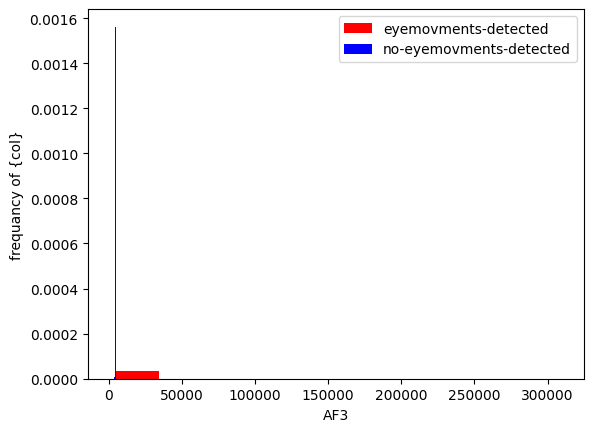

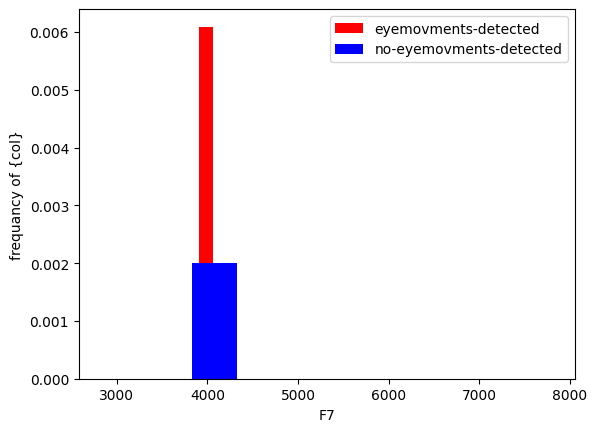

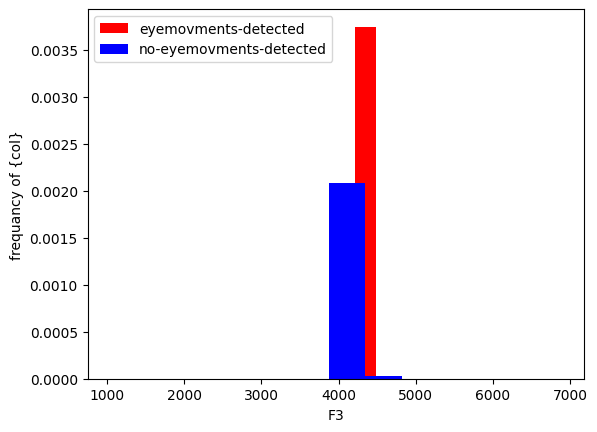

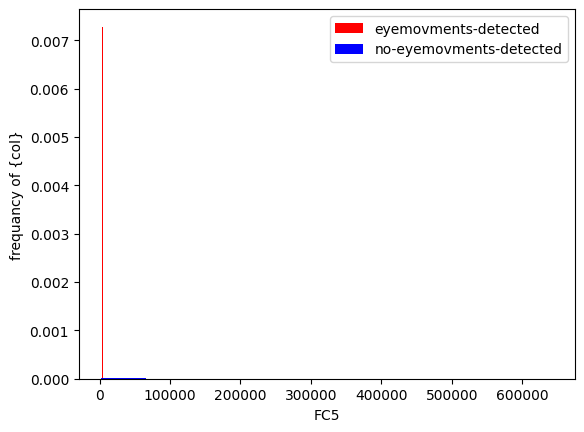

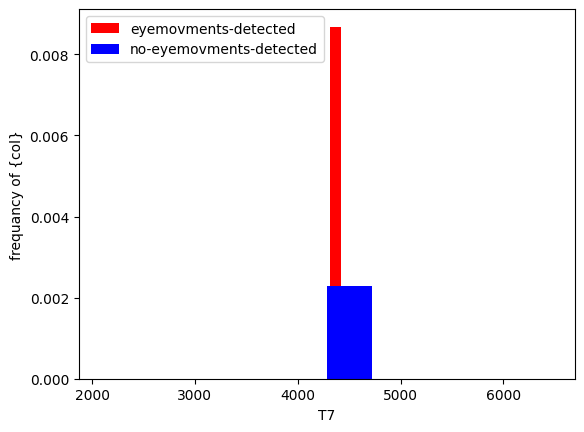

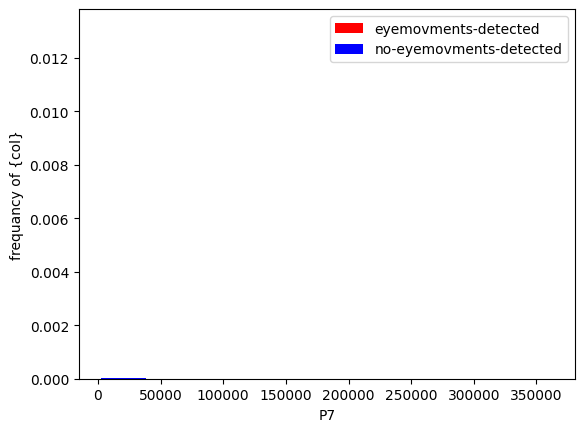

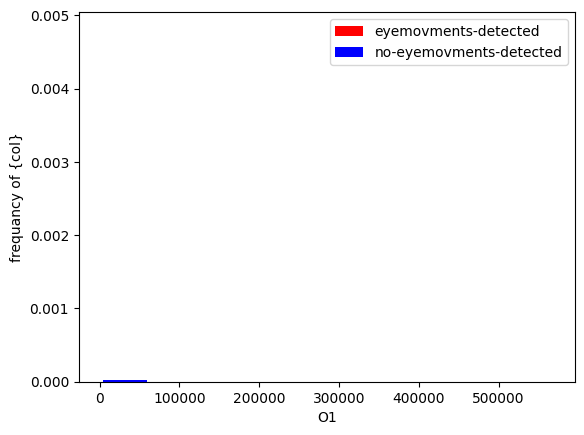

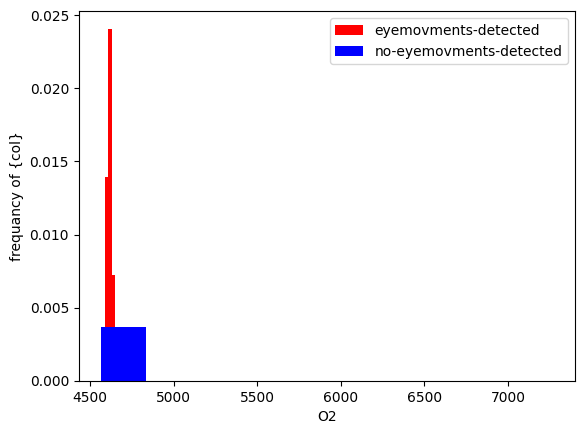

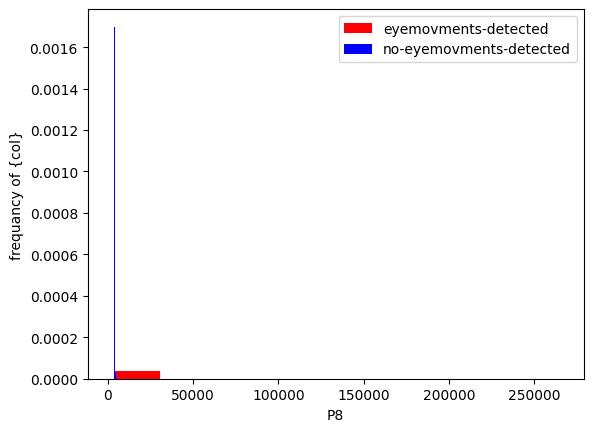

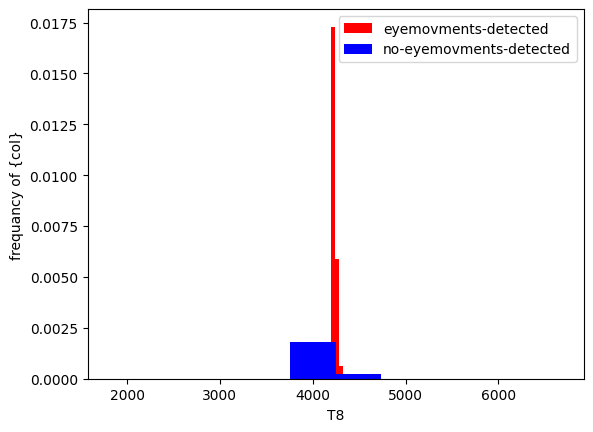

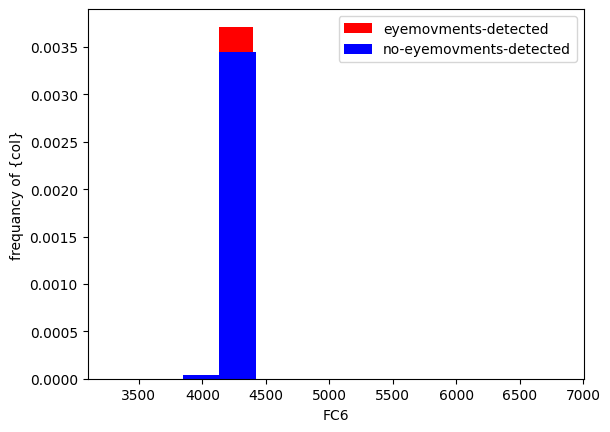

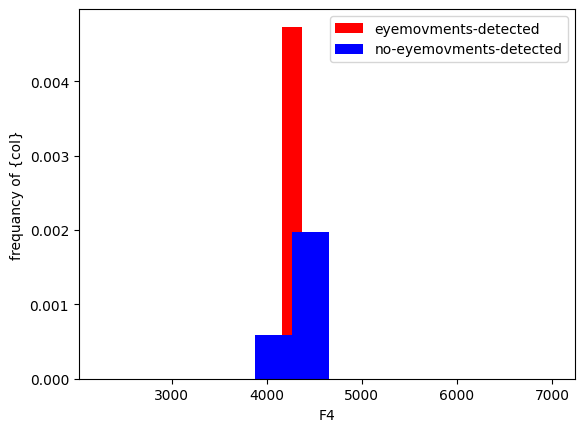

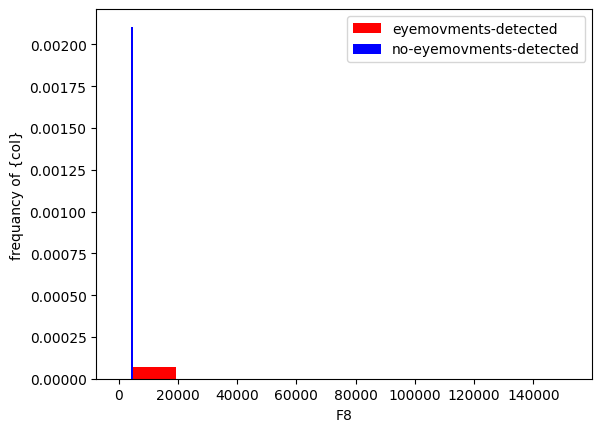

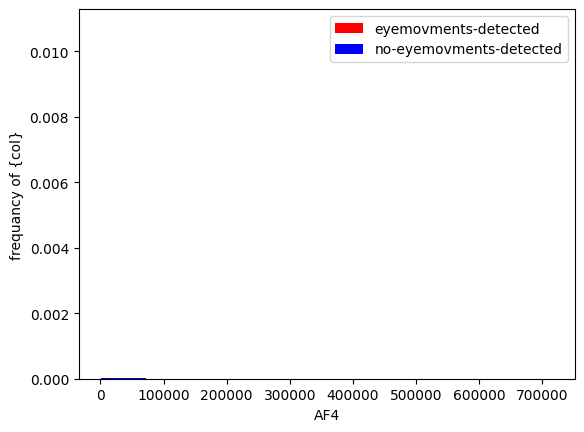

In [ ]:
X=pf_1.drop('eyeDetection',axis=1)
y=pf_1['eyeDetection']
for col in X:
  plt.hist(pf_1[pf_1['eyeDetection']==1][col], color='red',label='eyemovments-detected',density='True')
  plt.hist(pf_1[pf_1['eyeDetection']==0][col],color='blue',label='no-eyemovments-detected',density='True')
  plt.xlabel(col)
  plt.ylabel('frequancy of {col}')
  plt.legend()
  plt.show()

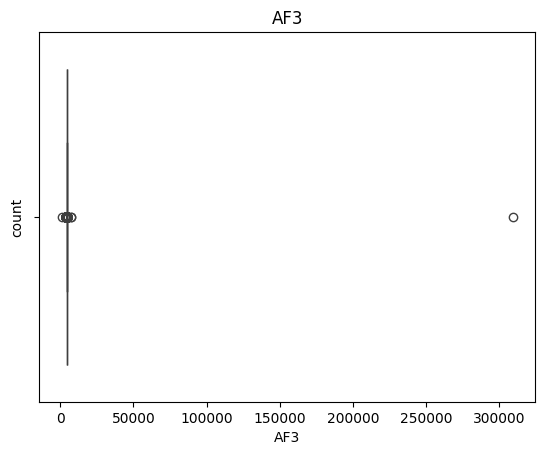

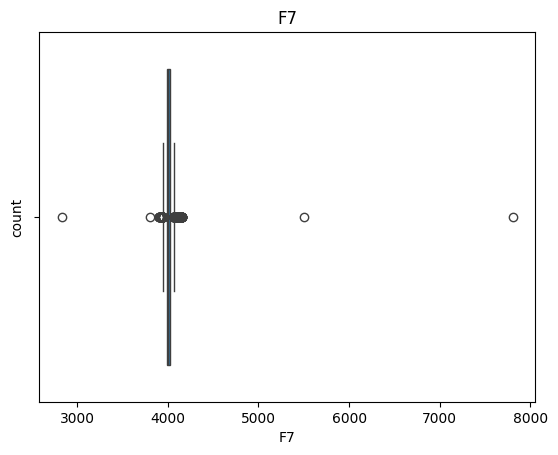

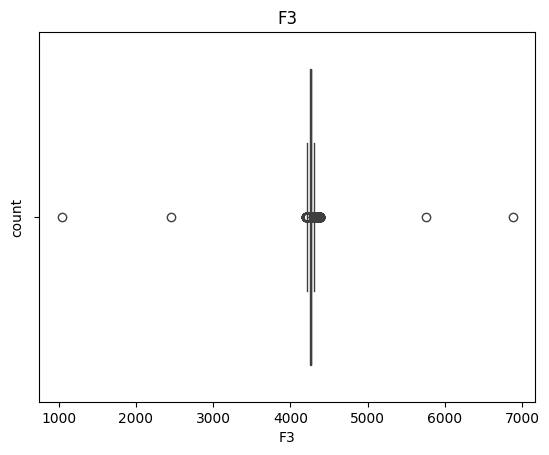

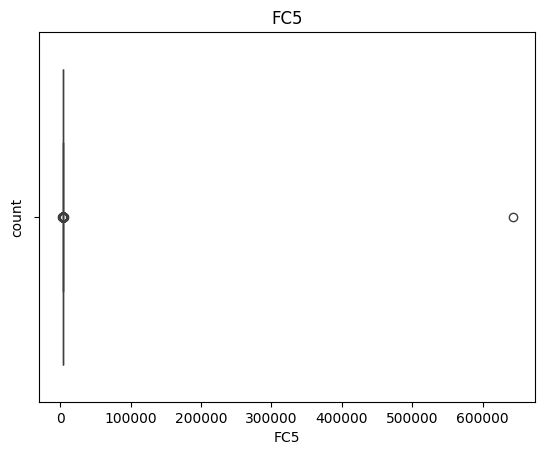

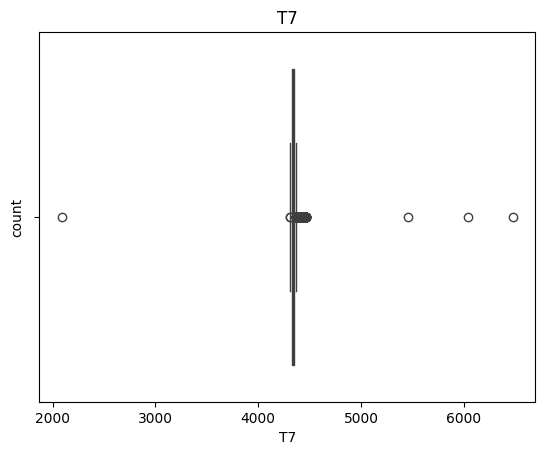

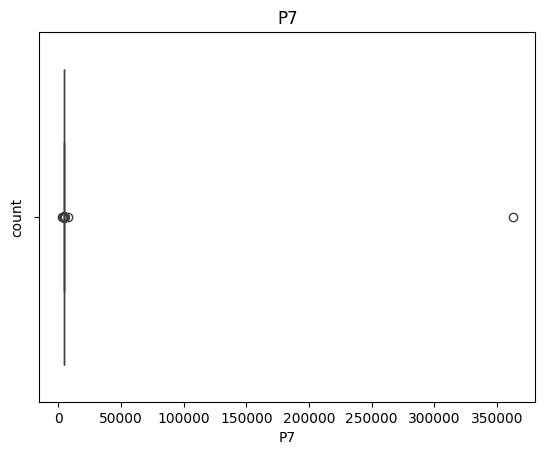

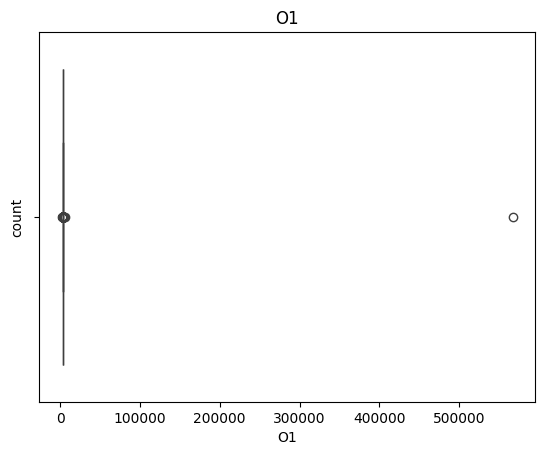

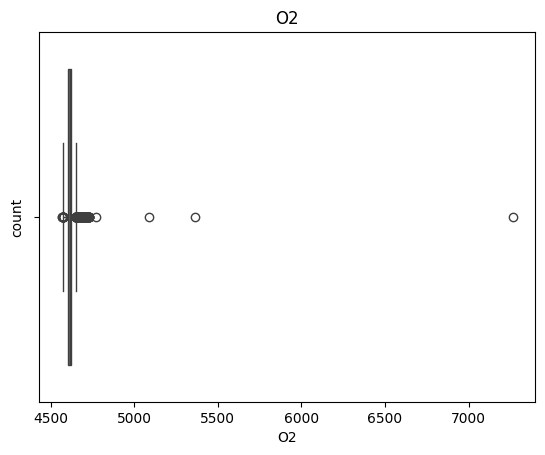

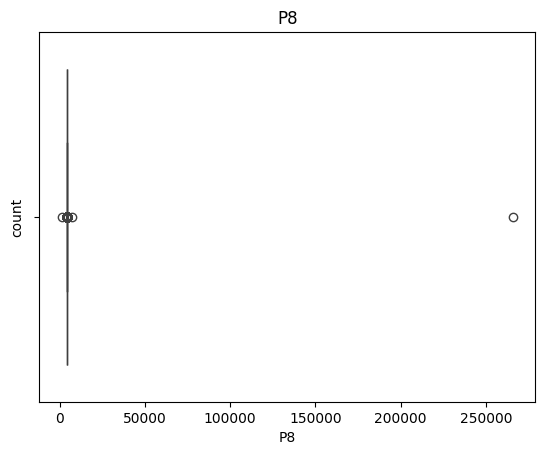

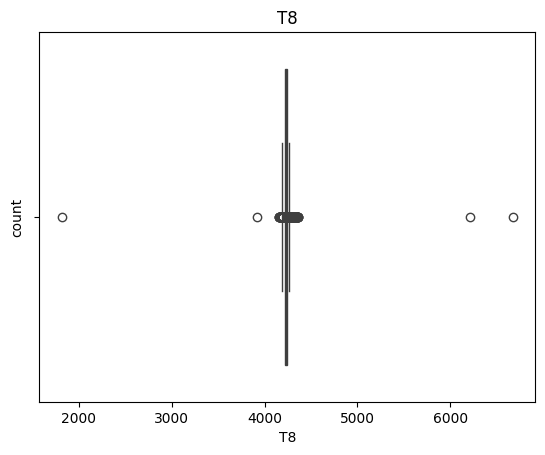

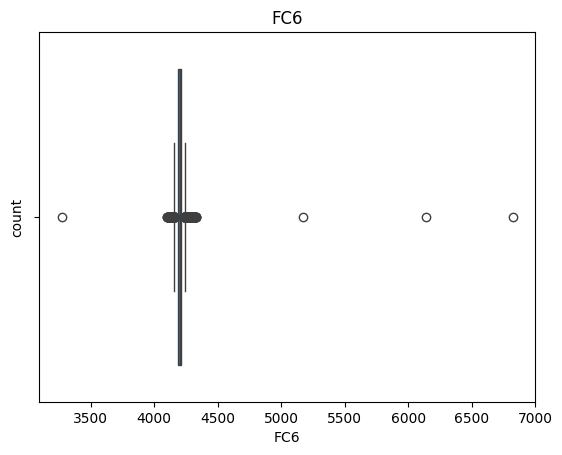

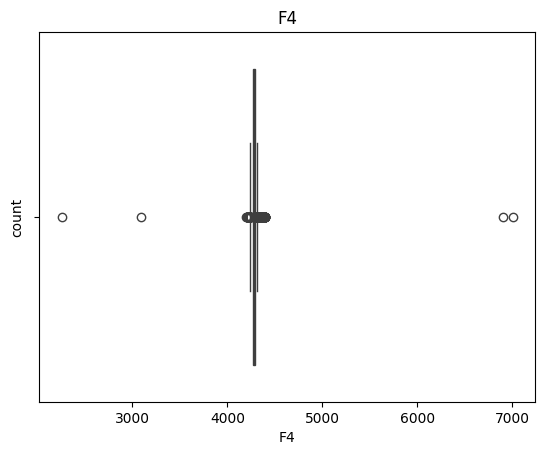

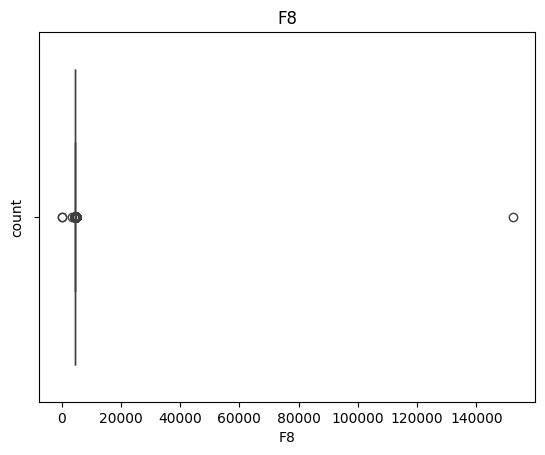

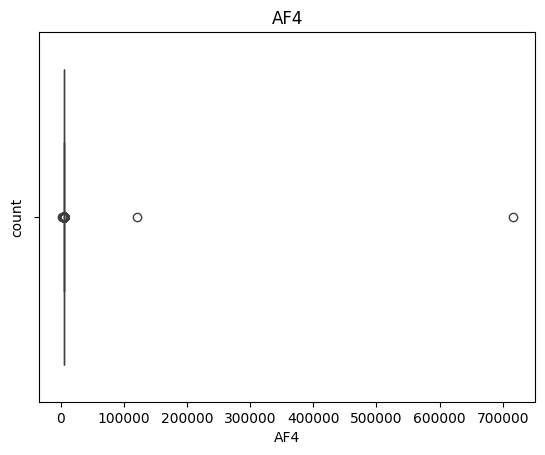

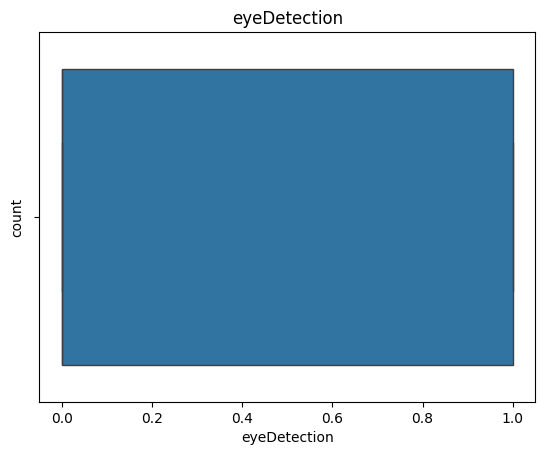

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'col' should contain the numerical columns
col = pf_1.select_dtypes(include='number').columns

for column_name in col:
  sns.boxplot(x=pf_1[column_name]) # Pass the column data to boxplot using x=
  plt.title(column_name)
  plt.xlabel(column_name)
  plt.ylabel('count')
  plt.show()

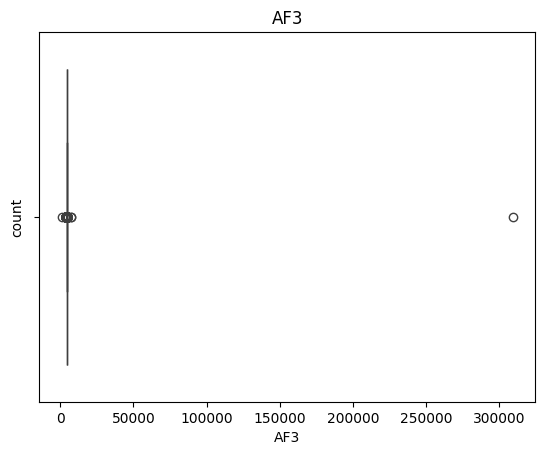

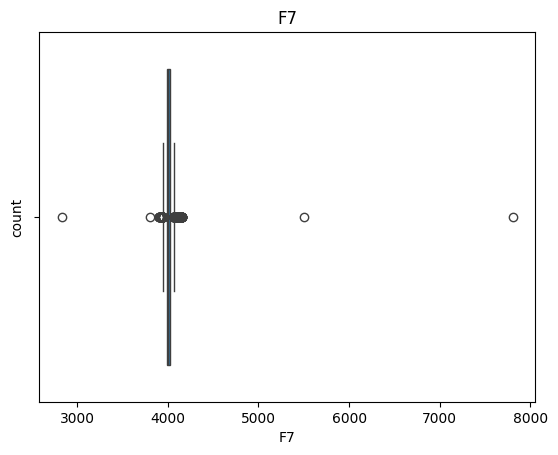

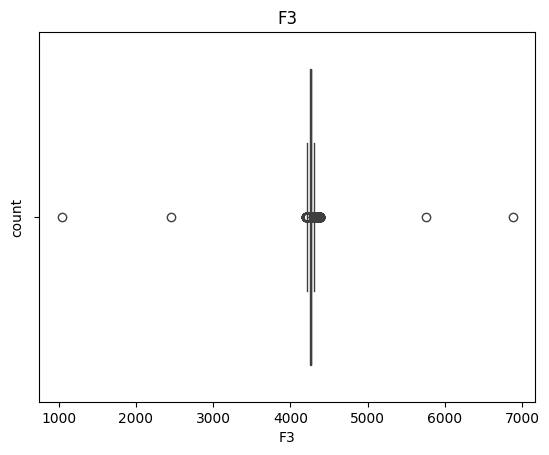

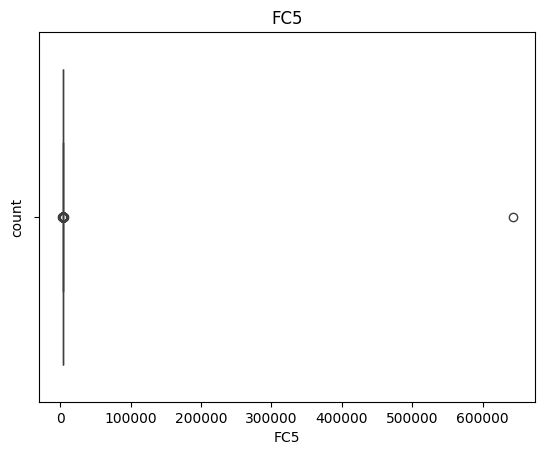

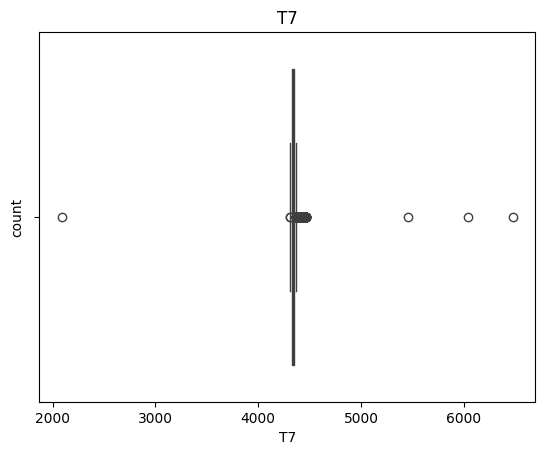

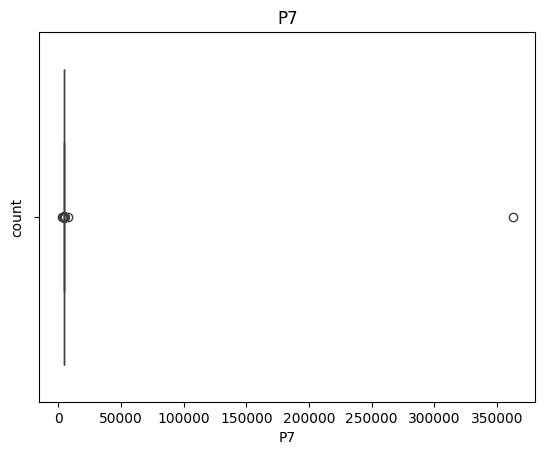

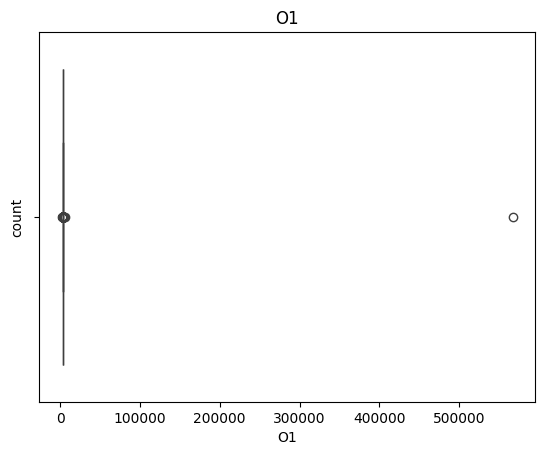

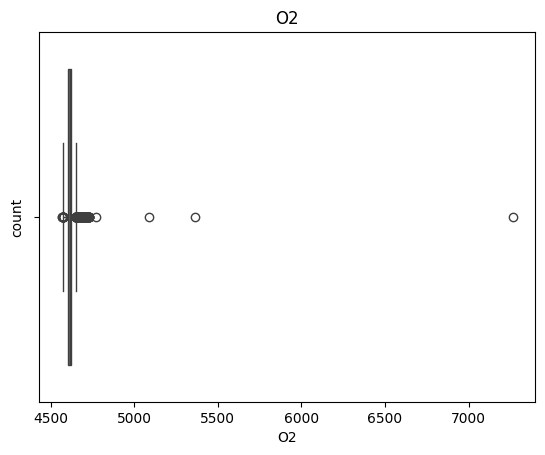

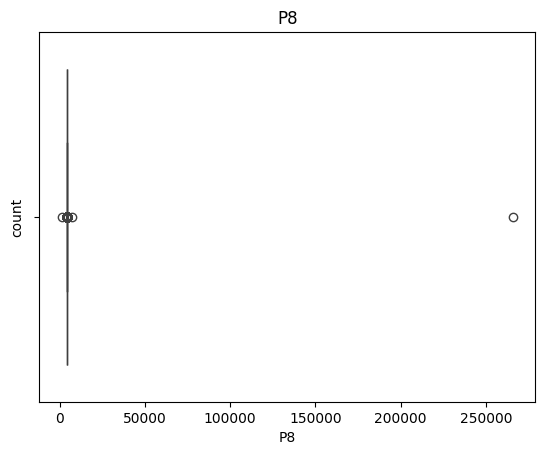

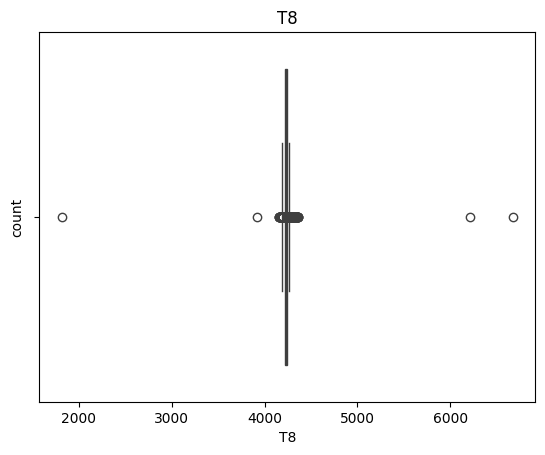

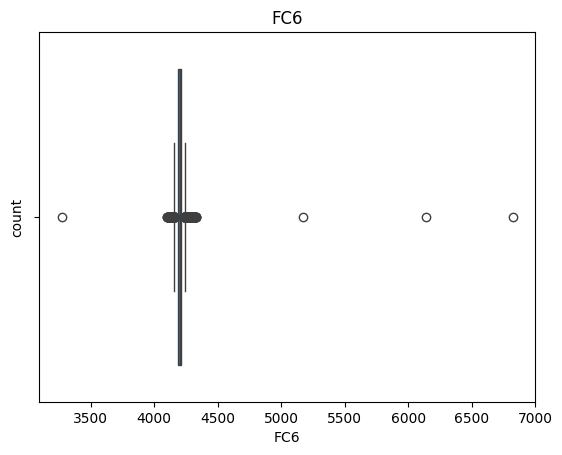

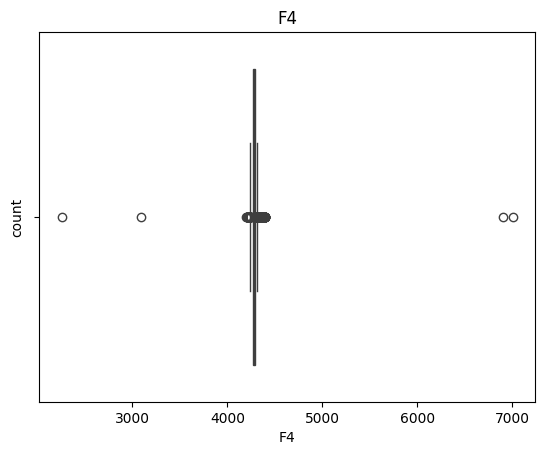

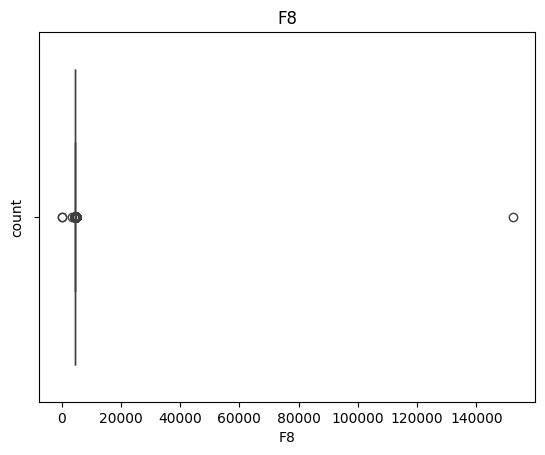

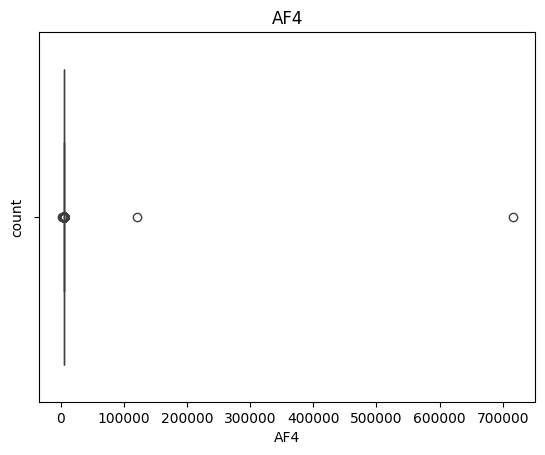

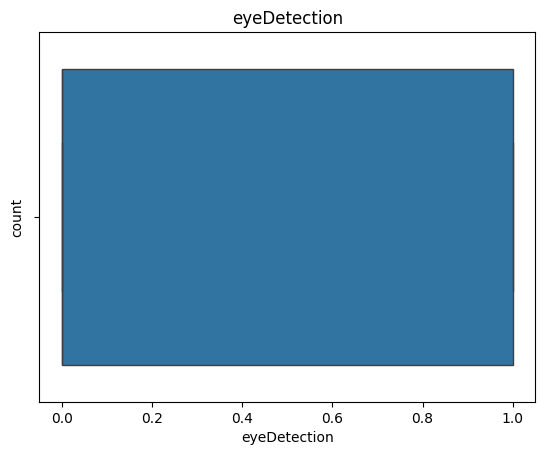

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'col' should contain the numerical columns
col = pf_1.select_dtypes(include='number').columns

for column_name in col:
  sns.boxplot(x=pf_1[column_name]) # Pass the column data to boxplot using x=
  plt.title(column_name)
  plt.xlabel(column_name)
  plt.ylabel('count')
  plt.show()

In [ ]:
pf_1.isnull().sum()

,0
AF3,0
F7,0
F3,0
FC5,0
T7,0
P7,0
O1,0
O2,0
P8,0
T8,0


In [ ]:
pf_1.duplicated().sum()

0

In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(pf_1.select_dtypes(include=[np.number])))
outliers = np.where(z_scores > 3)
print(outliers)

Q1 = pf_1.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = pf_1.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1


outliers = ((pf_1.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | (pf_1.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))
print(outliers)

(array([  160,   161,   162,   163,   164,   165,   166,   167,   184,
         185,   186,   188,   189,   898,   898,   898,   898,   898,
         898,   898,   898,   898,   898,  1305,  1306, 10386, 10386,
       10386, 10386, 10386, 10386, 10386, 10386, 10386, 10386, 10666,
       10667, 10667, 10668, 10669, 10670, 10671, 10671, 10672, 10672,
       10673, 10673, 10674, 10674, 10674, 10675, 10675, 10675, 10675,
       10676, 10676, 10676, 10676, 10677, 10677, 10677, 10677, 10678,
       10678, 10678, 10678, 10679, 10679, 10679, 10679, 10680, 10680,
       10680, 10681, 10681, 10681, 10682, 10682, 10682, 10682, 10683,
       10683, 10683, 10683, 10684, 10684, 10684, 10684, 10685, 10685,
       10685, 10686, 10686, 10686, 10687, 10687, 10687, 10687, 10688,
       10688, 10688, 10688, 10689, 10689, 10689, 10689, 10690, 10690,
       10690, 10690, 10691, 10691, 10691, 10691, 10692, 10692, 10692,
       10692, 10693, 10693, 10693, 10693, 10694, 10694, 10694, 10694,
       10695, 10695

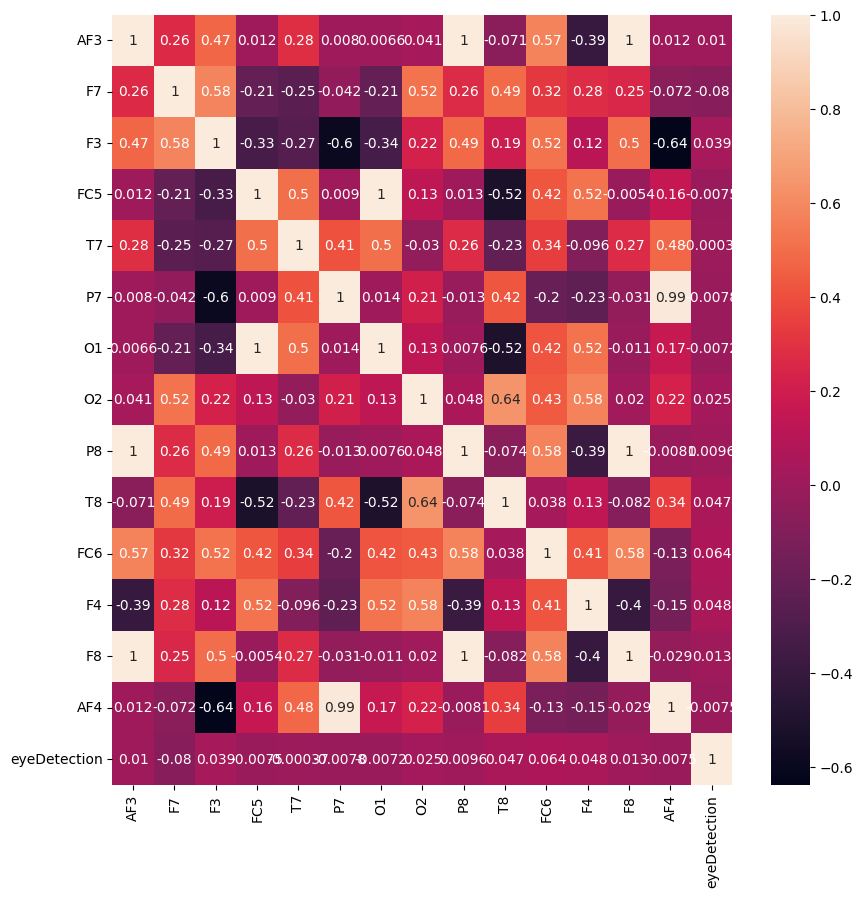

In [ ]:
s_1=pf_1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(s_1,annot=True)
plt.show()

In [ ]:
pf_2=pd.read_csv('/content/EEG_data.csv')        #EEG ALPHA,BETA,GAMMA
pf_2.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [ ]:
pf_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB


In [ ]:
pf_2.describe()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000
mean,4.487394,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606
std,2.865373,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861
min,0.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000
25%,2.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000
50%,4.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000
75%,7.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000
max,9.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000


In [ ]:
pf_2.shape

(12811, 15)

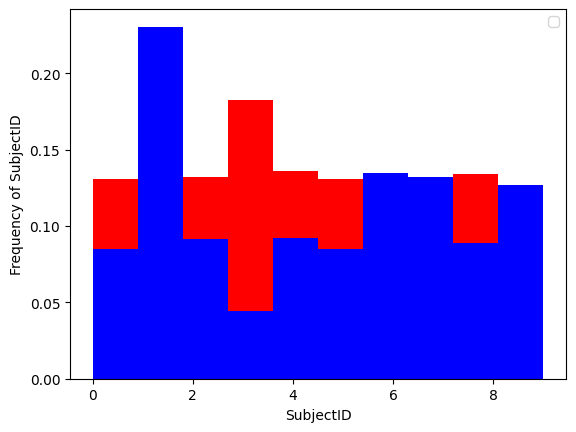

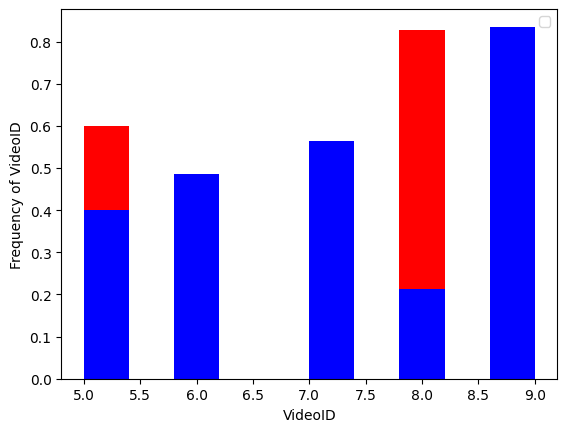

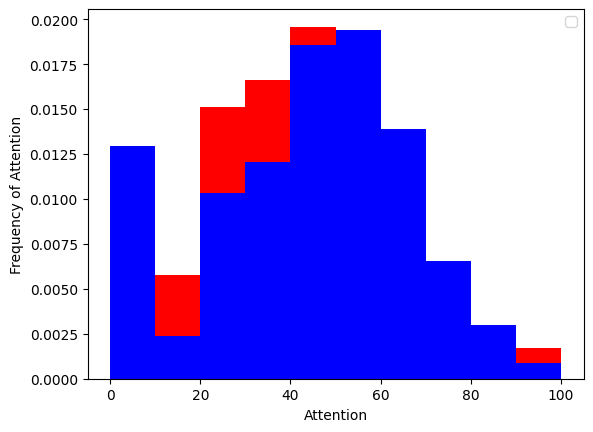

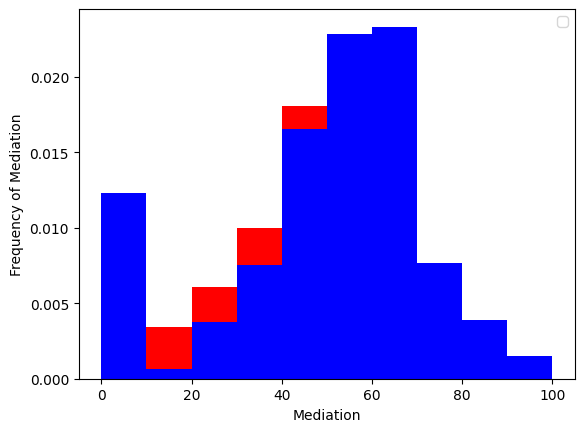

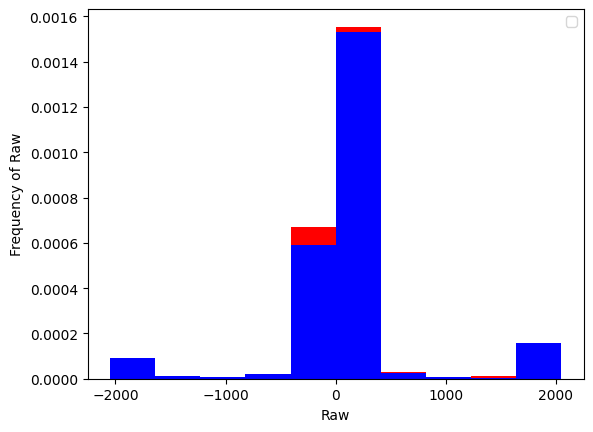

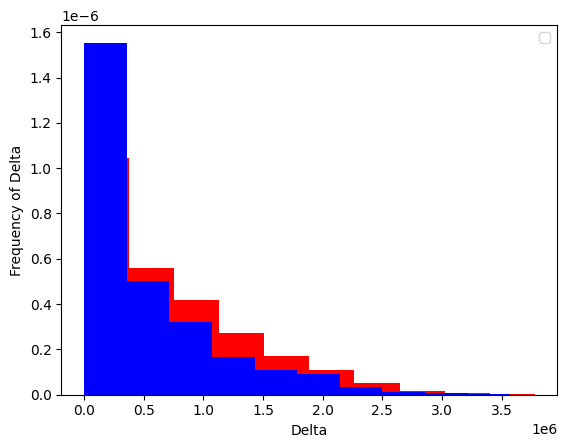

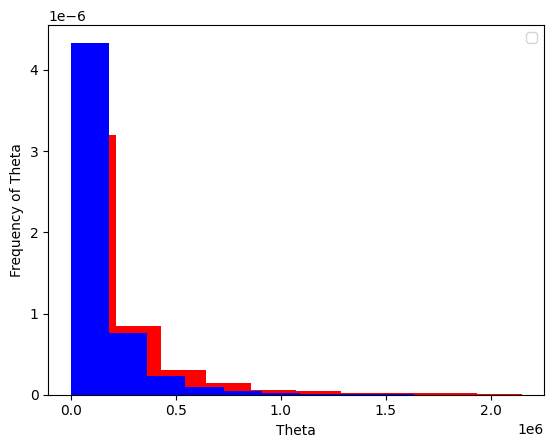

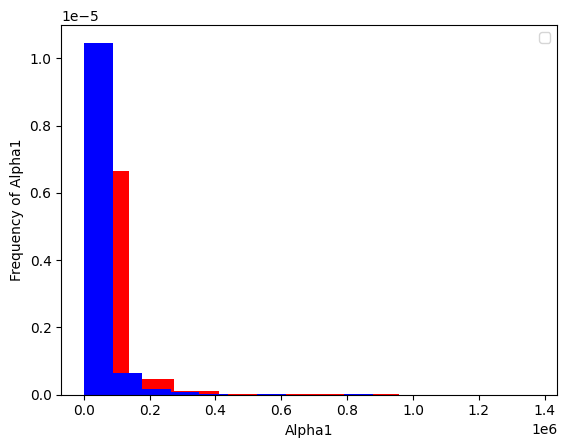

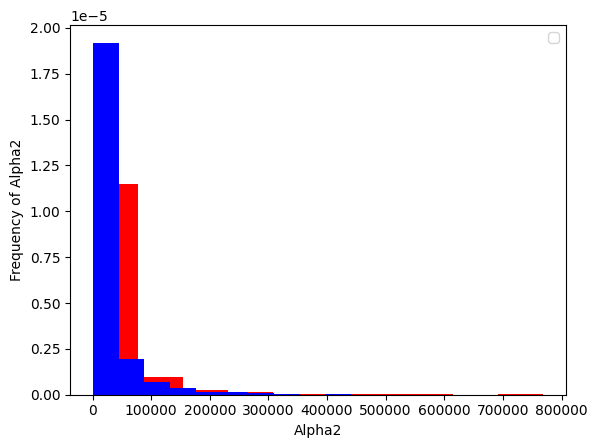

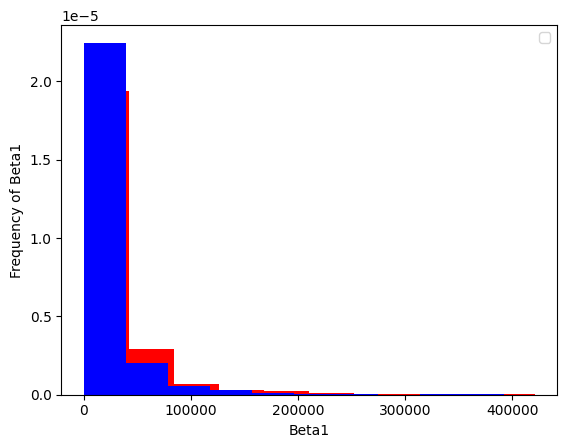

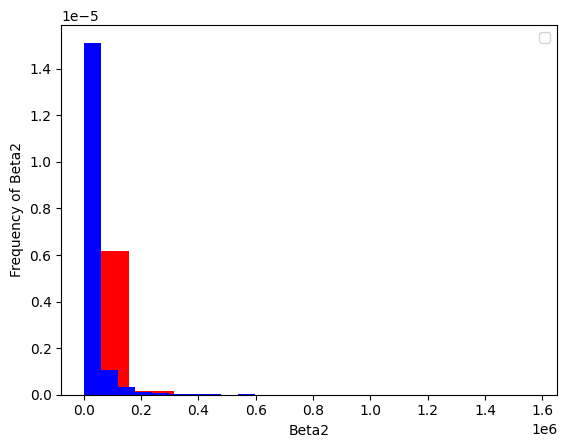

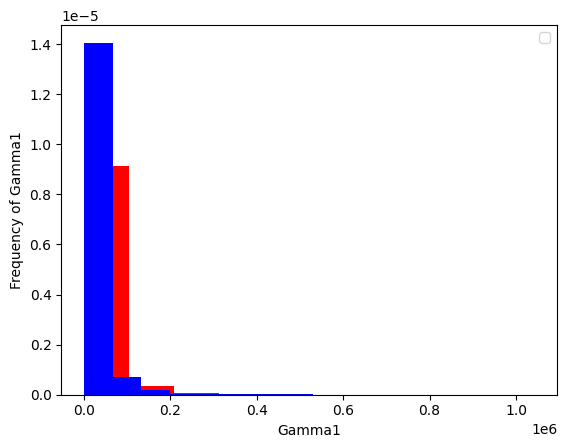

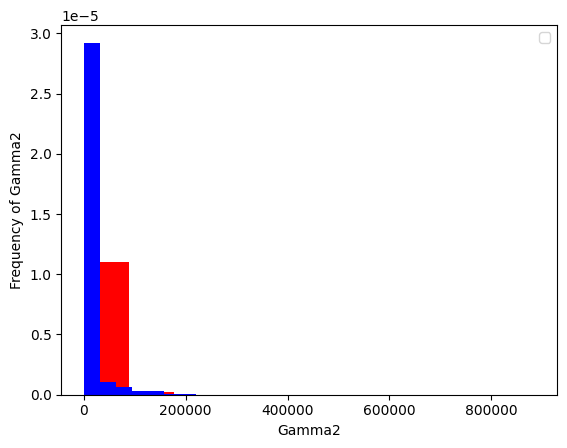

In [ ]:
import matplotlib.pyplot as plt

X = pf_2.drop(['predefinedlabel', 'user-definedlabeln'], axis=1)
y = pf_2[['predefinedlabel', 'user-definedlabeln']]

for col in X:

  data_red = pf_2[(pf_2['predefinedlabel'] == 1) & (pf_2['user-definedlabeln'] == 1)][col]
  data_blue = pf_2[(pf_2['predefinedlabel'] == 0) & (pf_2['user-definedlabeln'] == 0)][col]

  plt.hist(data_red, color='red', density=True)
  plt.hist(data_blue, color='blue', density=True)
  plt.xlabel(col)
  plt.ylabel(f'Frequency of {col}')
  plt.legend()
  plt.show()

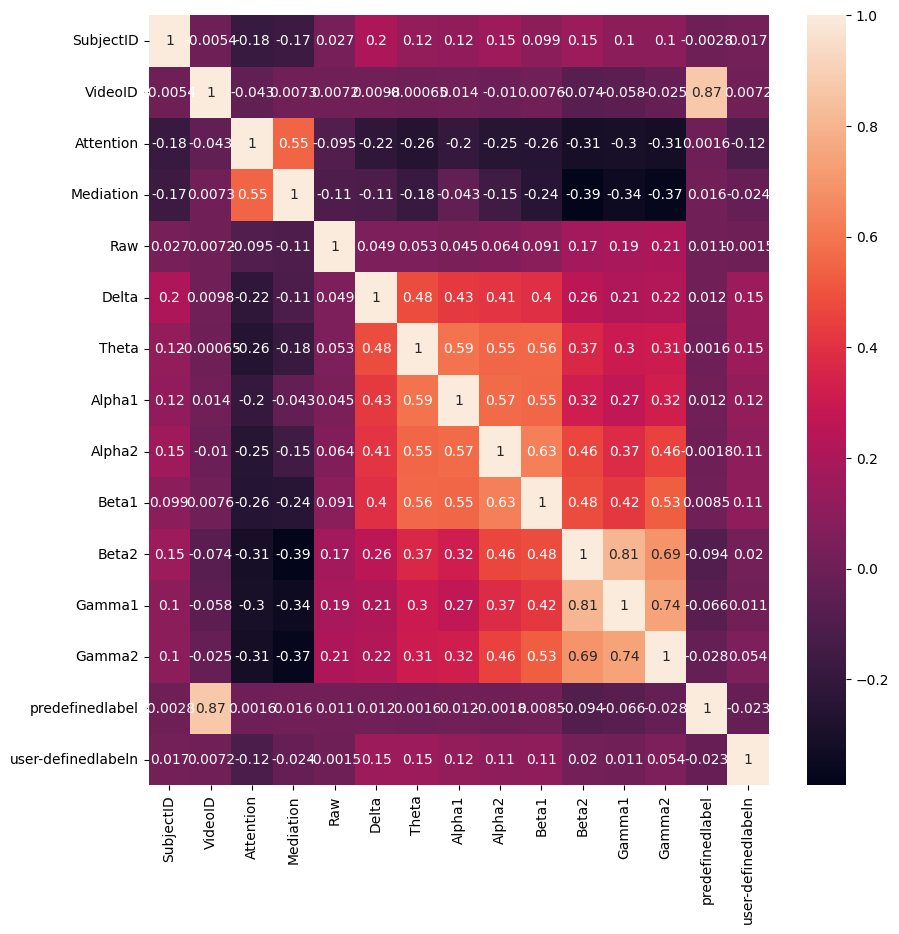

In [ ]:
s2=pf_2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(s2,annot=True)
plt.show()

In [ ]:
from scipy import stats

zscores = np.abs(stats.zscore(pf_2.select_dtypes(include=[np.number])))
outliers2 = np.where(zscores > 3)
print(outliers2)

q1 = pf_2.quantile(0.25)
q3 = pf_2.quantile(0.75)
iqr = q3 - q1


outliers2 = ((pf_2.select_dtypes(include=[np.number]) < (q1 - 1.5 * iqr)) | (pf_2.select_dtypes(include=[np.number]) > (q3 + 1.5 * iqr)))
print(outliers2)

(array([   32,   110,   116, ..., 12807, 12810, 12810]), array([ 9,  5,  5, ..., 10,  6, 10]))
       SubjectID  VideoID  Attention  Mediation    Raw  Delta  Theta  Alpha1  \
0          False    False      False      False   True  False  False   False   
1          False    False      False      False  False  False  False   False   
2          False    False      False      False  False  False  False    True   
3          False    False      False      False  False  False  False   False   
4          False    False      False      False  False  False  False   False   
...          ...      ...        ...        ...    ...    ...    ...     ...   
12806      False    False      False      False  False  False  False   False   
12807      False    False      False      False   True  False   True    True   
12808      False    False      False      False   True  False  False   False   
12809      False    False      False      False  False  False  False   False   
12810      False    False

In [ ]:
col2=pf_2.select_dtypes(include='number').columns
col2

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln'],
      dtype='object')

### EYE DETECTION


In [ ]:
X_train_eye, X_test_eye, y_train_eye, y_test_eye = train_test_split(X, y, test_size=0.3, random_state=42)
print("dimension of train data : ", X_train_eye.shape, y_train_eye.shape)
print("dimension of test data : ", X_test_eye.shape, y_test_eye.shape)

dimension of train data :  (8967, 13) (8967, 2)
dimension of test data :  (3844, 13) (3844, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1846
           1       0.91      0.97      0.94      1942

   micro avg       0.95      0.98      0.97      3788
   macro avg       0.96      0.98      0.97      3788
weighted avg       0.95      0.98      0.97      3788
 samples avg       0.73      0.73      0.73      3788



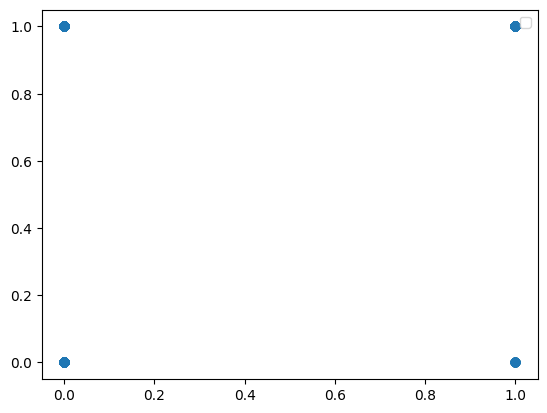

In [ ]:
scaler=StandardScaler()
X_train_eye=scaler.fit_transform(X_train_eye)
X_test_eye=scaler.transform(X_test_eye)
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train_eye,y_train_eye)
y_per_eye=model.predict(X_test_eye)
print(classification_report(y_test_eye,y_per_eye))
plt.scatter(y_test_eye,y_per_eye)
plt.legend()
plt.show()

###STRESS DETECTION


In [ ]:
pf_2['beta-alpha-ratio'] = (pf_2['Beta1'] + pf_2['Beta2']) / (pf_2['Alpha1'] + pf_2['Alpha2'])

def asssign_stress_level(row):
  if row['beta-alpha-ratio']>1.5:
    return 2
  elif row['beta-alpha-ratio']<1.5 and row['beta-alpha-ratio']>1:
    return 1
  elif row['beta-alpha-ratio']<1:
    return 0

pf_2['stress_level']=pf_2.apply(asssign_stress_level,axis=1)
print(pf_2['stress_level'])

0        1
1        2
2        0
3        0
4        1
        ..
12806    2
12807    2
12808    0
12809    0
12810    2
Name: stress_level, Length: 12811, dtype: int64


In [ ]:
X_stress = pf_2[['Beta1', 'Beta2', 'Alpha1', 'Alpha2']]
y_stress = pf_2['stress_level']

X_stress_train, X_stress_test, y_stress_train, y_stresss_test = train_test_split(X_stress, y_stress, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_stress_train, y_stress_train)
y_pred_stress = model.predict(X_stress_test)

print(classification_report(y_stresss_test, y_pred_stress))

decision_tree_accuracy = accuracy_score(y_stresss_test, y_pred_stress)
print(f"Decision Tree Accuracy: {decision_tree_accuracy * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1560
           1       0.65      0.63      0.64       398
           2       0.90      0.91      0.91       605

    accuracy                           0.89      2563
   macro avg       0.83      0.83      0.83      2563
weighted avg       0.89      0.89      0.89      2563

Decision Tree Accuracy: 88.80%


In [ ]:
from scikitlaarn import LinearRegrssion
from sklearn.metrics import mean_squared_error, r2_score
X_train,Y_train,X_test,Y_test=split
X_stress = pf_2[['Beta1', 'Beta2', 'Alpha1', 'Alpha2']]
y_stress = pf_2['stress_level']
model=fit(X_stress,y_stress)
y_pred_stress=model.predict(X_stress_test)

ADHD dETECTION

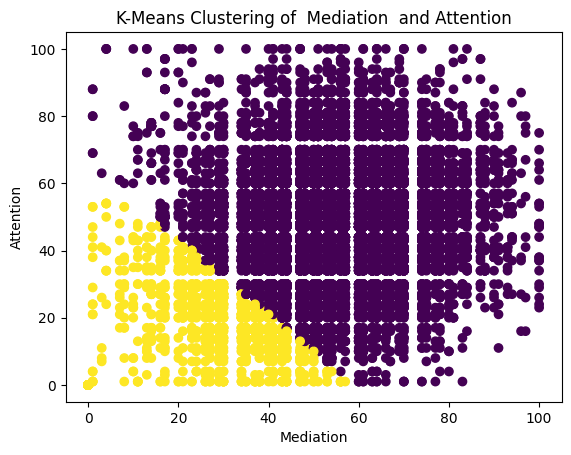

0        1
1        1
2        1
3        1
4        1
        ..
12806    1
12807    1
12808    1
12809    1
12810    1
Name: ADHD_Prediction, Length: 12811, dtype: int64
Decision Tree Accuracy: 88.80%


In [ ]:
X_adhd = pf_2[['Mediation', 'Attention']]
scaler = StandardScaler()
X_adhd_scaled = scaler.fit_transform(X_adhd)

kmeans = KMeans(n_clusters=2, random_state=42)
pf_2['Cluster'] = kmeans.fit_predict(X_adhd_scaled)

plt.scatter(pf_2['Mediation'], pf_2['Attention'], c=pf_2['Cluster'], cmap='viridis')
plt.xlabel( 'Mediation')
plt.ylabel('Attention')
plt.title('K-Means Clustering of  Mediation  and Attention')
plt.show()

pf_2['ADHD_Prediction'] = np.where(pf_2['Cluster'] == 0, 1, 0)

print(pf_2['ADHD_Prediction'])
adhd_accuracy = accuracy_score(y_stresss_test, y_pred_stress)
print(f"Decision Tree Accuracy: {adhd_accuracy * 100:.2f}%")

### STOKE DETECTION

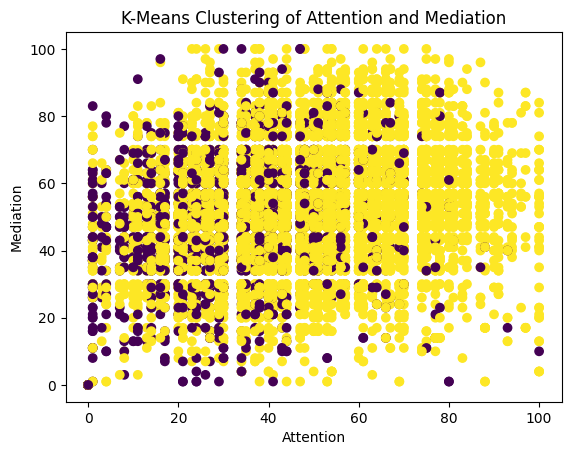

Stroke Prediction for each instance:
       Attention  Mediation  Cluster  Stroke_Prediction
0           56.0       43.0        1                  0
1           40.0       35.0        1                  0
2           47.0       48.0        0                  1
3           47.0       57.0        1                  0
4           44.0       53.0        0                  1
...          ...        ...      ...                ...
12806       64.0       38.0        1                  0
12807       61.0       35.0        0                  1
12808       60.0       29.0        1                  0
12809       60.0       29.0        1                  0
12810       64.0       29.0        0                  1

[12811 rows x 4 columns]

Cluster Centers (Attention, Mediation, Delta, Theta, Alpha):
[[2.35102833e+01 3.41765619e+01 1.38120566e+06 4.79611639e+05
  1.21246547e+05 9.79776558e+04]
 [4.57969513e+01 5.04576901e+01 4.10528434e+05 8.95996387e+04
  2.12744346e+04 1.68676989e+04]]
Decision Tre

In [ ]:
X_stroke = pf_2[['Attention', 'Mediation', 'Delta', 'Theta', 'Alpha1', 'Alpha2']]

scaler = StandardScaler()
X_stroke_scaled = scaler.fit_transform(X_stroke)

kmeans = KMeans(n_clusters=2, random_state=42)
pf_2['Cluster'] = kmeans.fit_predict(X_stroke_scaled)

plt.scatter(pf_2['Attention'], pf_2['Mediation'], c=pf_2['Cluster'], cmap='viridis')
plt.xlabel('Attention')
plt.ylabel('Mediation')
plt.title('K-Means Clustering of Attention and Mediation')
plt.show()


pf_2['Stroke_Prediction'] = np.where(pf_2['Cluster'] == 0, 1, 0)

print("Stroke Prediction for each instance:")
print(pf_2[['Attention', 'Mediation', 'Cluster', 'Stroke_Prediction']])

print("\nCluster Centers (Attention, Mediation, Delta, Theta, Alpha):")
print(scaler.inverse_transform(kmeans.cluster_centers_))

stroke_accuracy = accuracy_score(y_stresss_test, y_pred_stress)
print(f"Decision Tree Accuracy: {stroke_accuracy * 100:.2f}%")